In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input

In [20]:
# Membaca data dari file CSV
data = pd.read_csv('/kaggle/input/jobs-and-salaries-in-data-field-2024/jobs_in_data_2024.csv')

In [21]:
# Mengambil kolom 'salary_in_usd' sebagai target
target = data['salary_in_usd']

# Mengambil kolom numerik sebagai fitur
features = data[['work_year', 'salary_in_usd']]

In [22]:
# Memisahkan data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [23]:
# Standarisasi fitur menggunakan StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [24]:
# Membangun model jaringan saraf tiruan
model = Sequential()
model.add(Input(shape=(2,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1))

In [25]:
# Mengompilasi dan melatih model
model.compile(loss='mse', optimizer='adam')
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=32)

Epoch 1/50
355/355 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 26441691136.0000 - val_loss: 25755179008.0000
Epoch 2/50
355/355 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 25902966784.0000 - val_loss: 23949656064.0000
Epoch 3/50
355/355 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 23447867392.0000 - val_loss: 19616190464.0000
Epoch 4/50
355/355 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 18626996224.0000 - val_loss: 13353447424.0000
Epoch 5/50
355/355 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 12039139328.0000 - val_loss: 7213678080.0000
Epoch 6/50
355/355 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 6146854400.0000 - val_loss: 3111741696.0000
Epoch 7/50
355/355 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2577693952.0000 - val_loss: 1293033600.0000
Epoch 8/50
355/355 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1086935040.0000 - val_loss: 640794688.0000
Epoch 9/50
355/355 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 560606784.0000 - val_loss: 364827904.0000
Epoch 10/50
355/355 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - los

In [26]:
# Membuat prediksi menggunakan data uji
y_pred = model.predict(X_test)

89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


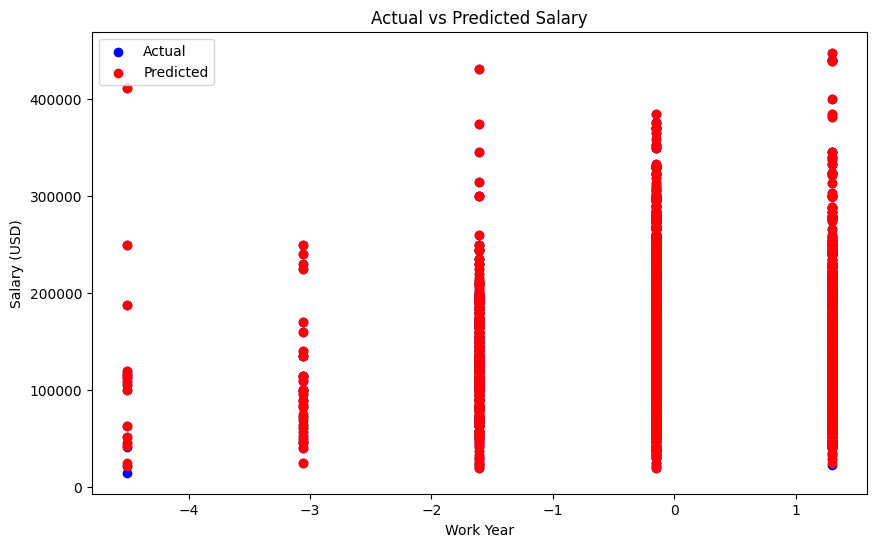

In [27]:
# Menggambar grafik hasil prediksi
plt.figure(figsize=(10, 6))
plt.scatter(X_test[:, 0], y_test, color='b', label='Actual')
plt.scatter(X_test[:, 0], y_pred, color='r', label='Predicted')
plt.xlabel('Work Year')
plt.ylabel('Salary (USD)')
plt.title('Actual vs Predicted Salary')
plt.legend()
plt.show()

In [28]:
from sklearn.metrics import mean_absolute_percentage_error

# Menghitung dan menampilkan akurasi model
mape = mean_absolute_percentage_error(y_test, y_pred)
print('Mean Absolute Percentage Error (MAPE):', mape)

Mean Absolute Percentage Error (MAPE): 0.00041577862590987726


In [29]:
# Menghitung dan menampilkan akurasi model dalam persentase
accuracy = (1 - mape) * 100
print('Accuracy: {:.2f}%'.format(accuracy))

Accuracy: 99.96%


In [30]:
# Mengambil beberapa contoh prediksi dan nilai target yang sebenarnya
num_examples = 10
sample_indices = np.random.choice(len(y_test), num_examples, replace=False)
y_pred_sample = y_pred[sample_indices]
y_test_sample = y_test.iloc[sample_indices]

# Menampilkan contoh prediksi dan nilai target yang sebenarnya
for i in range(num_examples):
    print('Example', i+1)
    print('Prediction:', y_pred_sample[i])
    print('Target Value:', y_test_sample.iloc[i])
    print('---')

Example 1
Prediction: [75026.18]
Target Value: 75000
---
Example 2
Prediction: [90028.95]
Target Value: 90000
---
Example 3
Prediction: [140004.4]
Target Value: 140000
---
Example 4
Prediction: [75026.18]
Target Value: 75000
---
Example 5
Prediction: [123054.766]
Target Value: 123040
---
Example 6
Prediction: [190005.2]
Target Value: 190000
---
Example 7
Prediction: [165011.16]
Target Value: 165000
---
Example 8
Prediction: [157850.16]
Target Value: 157850
---
Example 9
Prediction: [120034.5]
Target Value: 120000
---
Example 10
Prediction: [48616.71]
Target Value: 48585
---
